# Demo: a Simple MLP - The Pima Indian Dataset - CPU

## Introduction

It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

>__Note__: This demo is an opportunity to apply the 7-or-8 steps of our ML end-to-end project template seen in the previous module.

## Imports

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Input


## Globals

In [21]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# relative
DATA_TOPDIR = "./data"

PIMA_INDIANS_FILENAME = "pima-indians-diabetes.csv"

# syntheis

DATA_TOPDIR, PIMA_INDIANS_FILENAME


('./data', 'pima-indians-diabetes.csv')

## Step 1: Prepare your Dev Env. 

N/A

## Step 2: Framing the problem

It is a __binary classification__ problem (__onset of diabetes as 1__ or __not as 0__). 

__Goal:__ The objective is to build a model that will classify the patient in the two categories: __the patient has onset of diabetes__ or __the patient has not onset of diabetes__.

## Step 3: Summarize the data

__Load the data__

Since it is a little CSV file, one can use either Python code as bellow to inspect the file, or one can use a simple editor or a spreadsheet program to visualize it.

In [22]:
df = pd.read_csv(filepath_or_buffer=os.path.join(DATA_TOPDIR, PIMA_INDIANS_FILENAME), sep=",", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Interpretation:__
- No titles for each column or feature
- Different scales of features

__Quick data analysis__

The client gave us the definition of each column or feature: 
1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).

An the target:

9. __Class__, onset of diabetes within five years.
 



## Step 4: Data preparation

Build the feature matrix X, and the label vector Y. 

>__Note:__ And hide one part of the data!

In [24]:
X = df.values[:,0:8]
Y = df.values[:,8]
print("[INFO] whole dataset => ", X.shape, Y.shape)

# train test split
test_size = 0.20 # 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print("[INFO] training dataset => ", X_train.shape, Y_train.shape)
print("[INFO] testing dataset => ", X_test.shape, Y_test.shape)

[INFO] whole dataset =>  (768, 8) (768,)
[INFO] training dataset =>  (614, 8) (614,)
[INFO] testing dataset =>  (154, 8) (154,)


## Step 5: Select the baseline model

>__Note:__ Here, since it is a simple demo, the baseline model is built directly.

We use here the __Keras__ framework that you'll learn in more details later in this training course.

However, for the moment, just apply the following guidelines:
- create a Sequential model,
- add layers one at a time until we are happy with our network topology.

The first thing to get right is to ensure the __input layer has the right number of inputs__. It is easy because we know have 8 input variables (e.g. `X.shape[1]`).

>__Note:__ How do we know the number of layers to use and their types? This is a very hard question.
There are heuristics that we'll learn during this program.

>__Note:__ Here you can see the activation functions in action: 'relu' and 'sigmoid' adapted for binary classification output layer. 

>__Note:__  We will use _logarithmic loss_ which is the most use loss function for binary classification problems. In Keras, it is defined as _binary crossentropy_.
>
> We will also use the efficient __Adam__ implementation of the __Gradient Descent (GD)__ algorithm. 
>
> Finally, the __accuracy__ metric is selected for measuring the performances of the model. 

__Build the model__

In [25]:
# Architecture
model = Sequential()
model.add(Input(shape=(8,))),
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Configuration
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

__Train the model__

In [27]:
history = model.fit(
    x=X_train, 
    y=Y_train, 
    epochs=150, 
    batch_size=10,
    validation_data=(X_test, Y_test)
    #,
    #verbose=2
)

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5201 - loss: 5.1471 - val_accuracy: 0.5909 - val_loss: 2.1682
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5747 - loss: 1.4049 - val_accuracy: 0.6558 - val_loss: 1.1803
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.9825 - val_accuracy: 0.6364 - val_loss: 1.4651
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 0.9989 - val_accuracy: 0.5714 - val_loss: 0.8400
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 0.8354 - val_accuracy: 0.6818 - val_loss: 0.7686
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.6798 - val_accuracy: 0.6299 - val_loss: 0.7049
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.7562 - val_accuracy: 0.6623 - val_loss: 0.7419
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.6469 - val_accuracy: 0.7338 - v

__Learning curves__

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


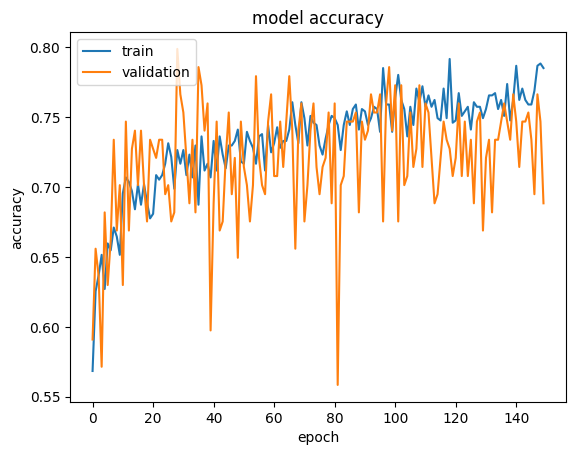

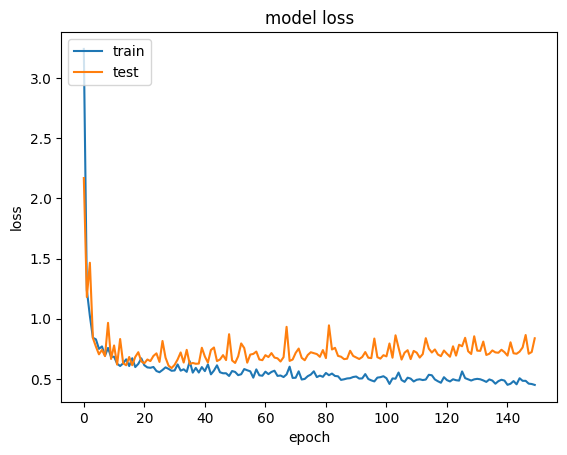

In [28]:
# check entries in the history 
print(history.history.keys()) # => dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


__Evaluate the model on test data__

In [29]:
# Final evaluation of the model
scores = model.evaluate(
    x=X_test, 
    y=Y_test
)

print("\n[INFO] Model Val Accuracy: %.2f%%, Error: %.2f%%" % (scores[1]*100, 100-scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7173 - loss: 0.7347 

[INFO] Model Val Accuracy: 68.83%, Error: 31.17%


__Finalizing the model__

>__Note:__ Actually the performance is very poor. In real life, the AI Developer SHOULD improve his/her model before delivery to the client! 

Here, we imagine we are satisfied with the model performances. Then we finalize it by running the following steps: 
1. Train the final model on all the training data 
1. Evaluate the target model
1. Save it locally on the disk

>__Note:__ These steps are not performed here because it is out of the scope of the demo.

__END OF NOTEBOOK.__